# Sinusodial Model Experiment

## imports

In [1]:
from scipy.optimize import curve_fit
import numpy as np
import itertools
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../lib")))

from model_helper import load_and_format_data, test_and_eval

## constants

In [2]:
GARAGES = ["North Garage", "West Garage", "South Garage"]

# choose dates used in dataset name
DATE_START = "2025-02-13"
DATE_END = "2025-04-14"

## perform experiment on entire normalized dataset

### load and format data

In [3]:
# garage used as key with each one assigned a tuple representing the (x_data, y_data)
garage_data = {}

for garage in GARAGES:
    garage_data[garage] = load_and_format_data(garage, DATE_START, DATE_END)

### train model

In [4]:
initial_guess = [50, 0.005, 500, 50]
def sinusoidal_model(x, A, B, C, D):
    return A * np.sin(B * x + C) + D

# keys are each garage with value being params or list of weights made
garage_models = {}
for garage in garage_data.keys():
    flat_x_data = list(itertools.chain.from_iterable(garage_data[garage][0]))
    flat_y_data = list(itertools.chain.from_iterable(garage_data[garage][1]))
    params, _ = curve_fit(sinusoidal_model, flat_x_data, flat_y_data, p0=initial_guess)
    garage_models[garage] = params

### inference, plot, and eval

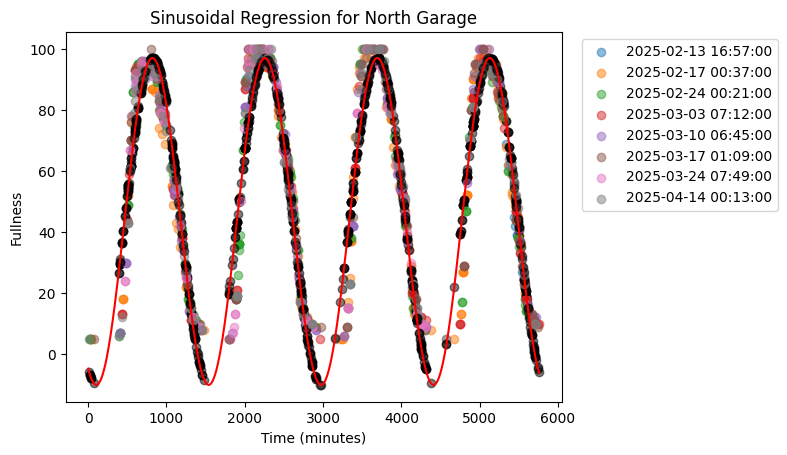

North Garage stats
r^2: 0.9045479724104815
rmse: 7.7669813262669365
mae: 10.32077229558721




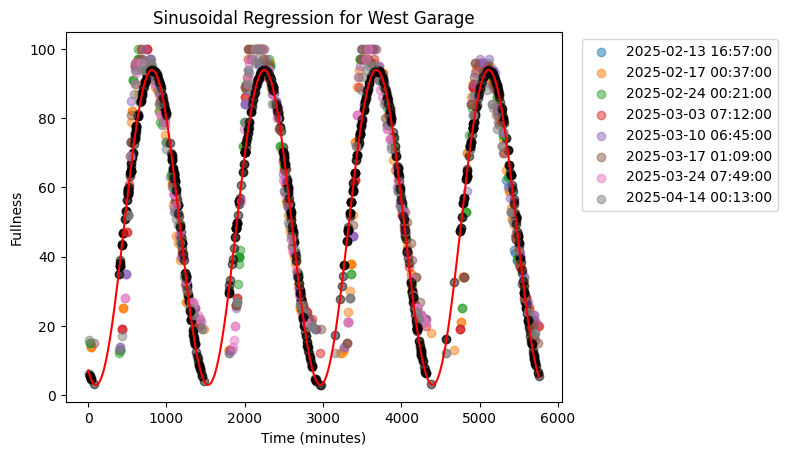

West Garage stats
r^2: 0.8706232027737362
rmse: 7.987074039479475
mae: 10.53298621661736




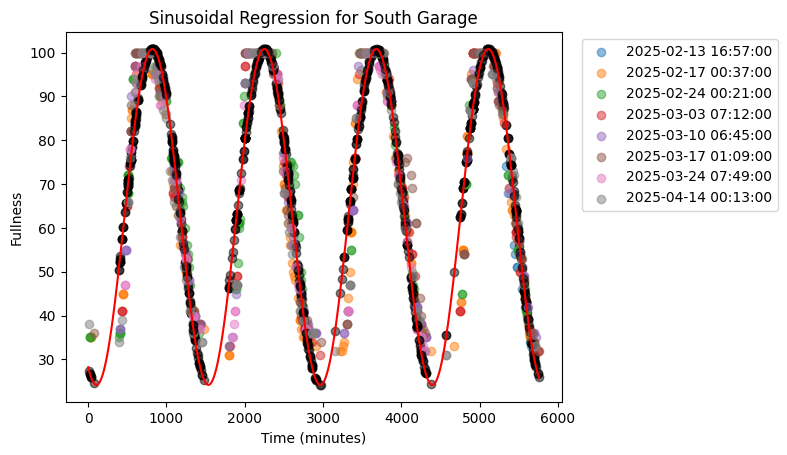

South Garage stats
r^2: 0.8963812399521915
rmse: 5.83073240715964
mae: 7.870959817396344




In [5]:
for garage in garage_models:
    test_and_eval(garage, garage_data[garage][2], garage_data[garage][0], garage_data[garage][1], sinusoidal_model, garage_models[garage])

## perform experiment on partitioned data

### load and format training data

In [6]:
garage_training_data = {}

for garage in GARAGES:
    garage_training_data[garage] = load_and_format_data(garage, DATE_START, DATE_END, "d_starting", "training")

### train model

In [7]:
garage_models = {}
for garage in garage_training_data.keys():
    flat_x_data = list(itertools.chain.from_iterable(garage_data[garage][0]))
    flat_y_data = list(itertools.chain.from_iterable(garage_data[garage][1]))
    params, _ = curve_fit(sinusoidal_model, flat_x_data, flat_y_data, p0=initial_guess)
    garage_models[garage] = params

### inference, plot, and eval

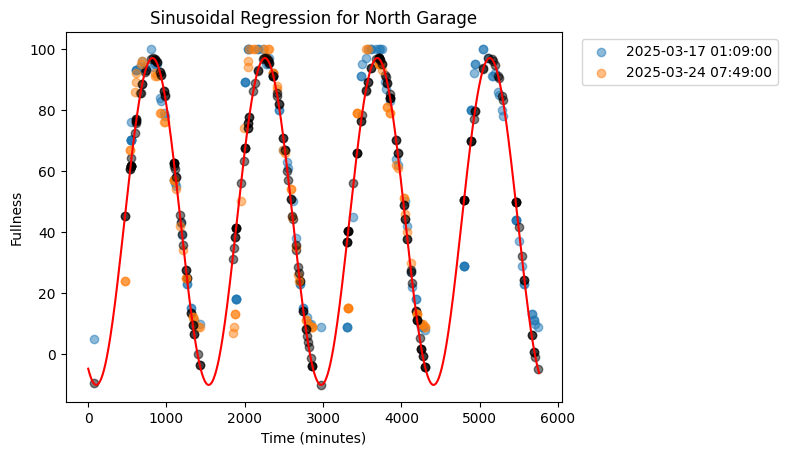

North Garage stats
r^2: 0.8953302245267843
rmse: 8.37117691635645
mae: 11.081418529165411




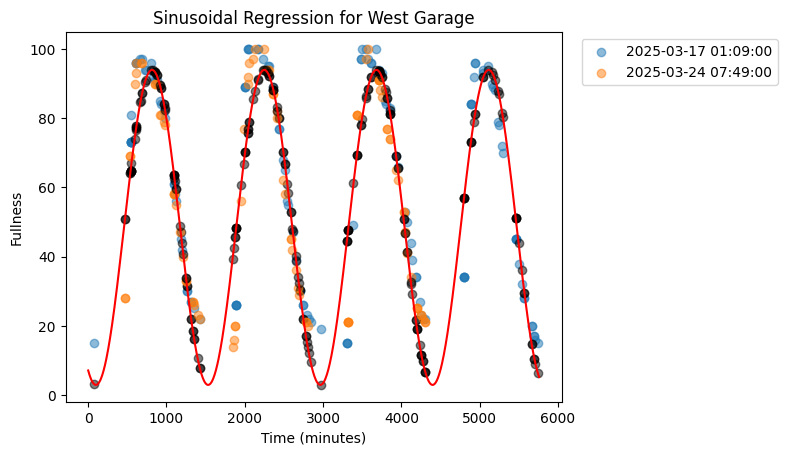

West Garage stats
r^2: 0.850472499206789
rmse: 8.723473513746894
mae: 11.426844696786057




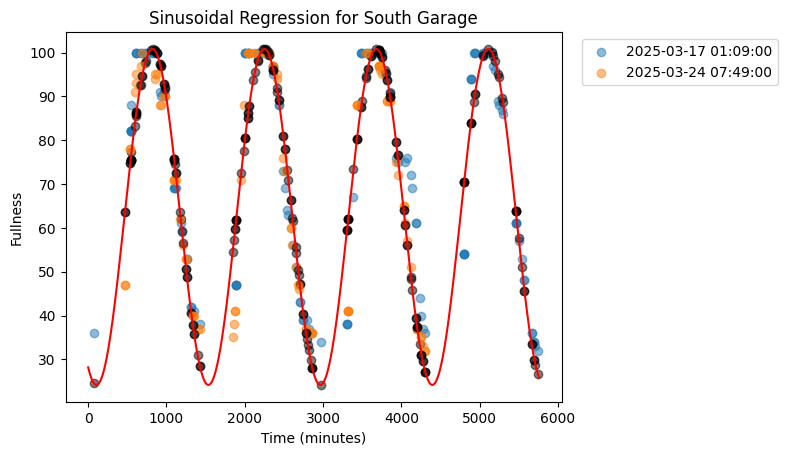

South Garage stats
r^2: 0.874178135779114
rmse: 6.427091517454768
mae: 8.765746066685772




In [8]:
for garage in GARAGES:
    x_data, y_data, start_dates = load_and_format_data(garage, DATE_START, DATE_END, "d_starting", "test")
    test_and_eval(garage, start_dates, x_data, y_data, sinusoidal_model, garage_models[garage])


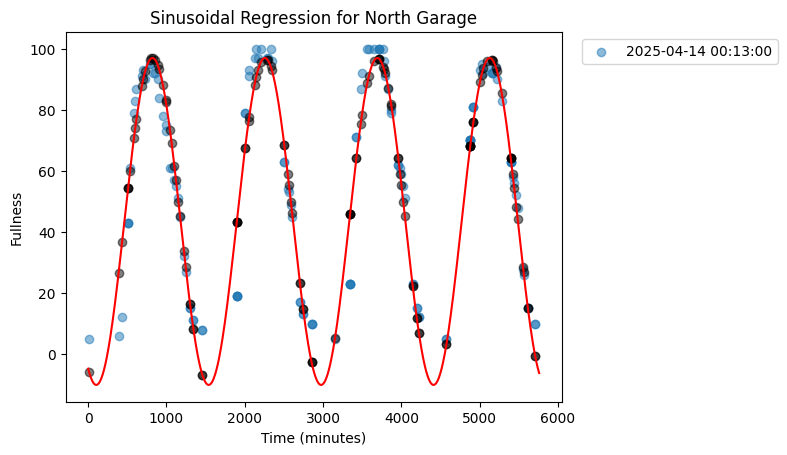

North Garage stats
r^2: 0.9262243291572283
rmse: 6.210444555067781
mae: 8.817031141508773




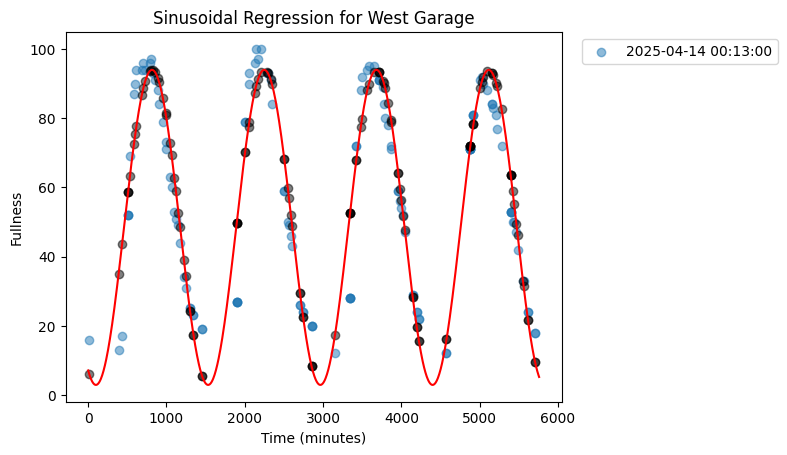

West Garage stats
r^2: 0.8852514395998192
rmse: 7.233937579768417
mae: 9.43975499895304




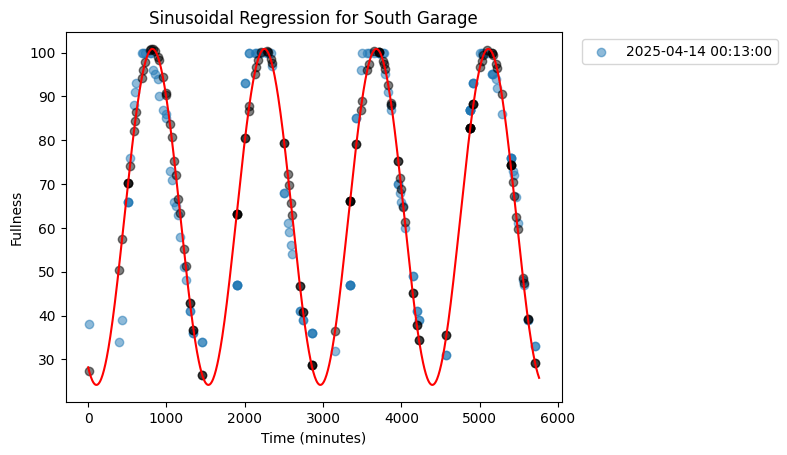

South Garage stats
r^2: 0.9125046283804016
rmse: 5.376020444076031
mae: 7.1332974680989585




In [9]:
for garage in GARAGES:
    x_data, y_data, start_dates = load_and_format_data(garage, DATE_START, DATE_END, "d_starting", "validation")
    test_and_eval(garage, start_dates, x_data, y_data, sinusoidal_model, garage_models[garage])